# 2020 Election Sentiment Analysis and Results Prediction

This project was completed as part of my DSC 680 Applied Data Science course.

In this project, I will be attempting to predict the 2020 Presidential Elect based on social media sentiment. I will be utilizing the dataset provided by by [Kaggle](https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets/data?select=hashtag_joebiden.csv) that utilized the Twitter API to obtain tweets regarding Joe Biden and Donald Trump. 

I will clean and process the dataset as needed. I will employ the sentiment analyzer tool TextBlob to capture the sentiment in these tweets, rating them from a score of -1 to 1. Finally, I will take the results and determine who would win based on this public sentiment.

### Importing data

In [1]:
import warnings

# ignore FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd

# col nums chosen remove any personal information about the user
# specifically: user_id, user_name, user_description, user_screen_name, user_join_date
cols = [0, 2, 3, 4, 5,  11, 12, 13, 14, 15, 16, 17, 18, 19]

biden = pd.read_csv('hashtag_joebiden.csv', usecols = cols, lineterminator = '\n')

biden.head()

,created_at,tweet,likes,retweet_count,source,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA


In [3]:
trump = pd.read_csv('hashtag_donaldtrump.csv', usecols=cols, low_memory = False, lineterminator = '\n')

trump.head()

,created_at,tweet,likes,retweet_count,source,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC


In [4]:
biden.shape

(776886, 14)

In [5]:
trump.shape

(970919, 14)

## Data cleanup and preprocessing
In this section, I will:
* Ensure data type regularity
* Deal with missing values as needed
* Remove any unnecessary features
* Preprocess tweets by removing unnecessary characters

### Checking data type regularity
This involves identifying variables represented as objects and converting them to the appropiate data type.

In [6]:
# checking data types
print(biden.dtypes)

created_at               object
tweet                    object
likes                   float64
retweet_count           float64
source                   object
user_followers_count    float64
user_location            object
lat                     float64
long                    float64
city                     object
country                  object
continent                object
state                    object
state_code               object
dtype: object


In [7]:
# convert created_at to datetime object
biden['created_at'] = pd.to_datetime(biden['created_at'])

trump['created_at'] = pd.to_datetime(biden['created_at'])

In [8]:
# convert likes, user_followers_count, lat, long to float64 types
biden = biden.astype({'likes' : float, "user_followers_count" : float, 'lat' : float, 'long' : float})

trump = trump.astype({'likes' : float, "user_followers_count" : float, 'lat' : float, 'long' : float})

print(biden.dtypes)

created_at              datetime64[ns]
tweet                           object
likes                          float64
retweet_count                  float64
source                          object
user_followers_count           float64
user_location                   object
lat                            float64
long                           float64
city                            object
country                         object
continent                       object
state                           object
state_code                      object
dtype: object


### Missing values
In this section, I will check the missing values and determine how to handle them.

In [9]:
biden.isnull().sum()

created_at                   0
tweet                        0
likes                        0
retweet_count                0
source                     713
user_followers_count         0
user_location           233791
lat                     421593
long                    421593
city                    590014
country                 423107
continent               423089
state                   516691
state_code              532277
dtype: int64

In [10]:
trump.isnull().sum()

created_at              194033
tweet                        0
likes                        0
retweet_count                0
source                     876
user_followers_count         0
user_location           294953
lat                     525200
long                    525200
city                    743732
country                 528171
continent               528154
state                   650299
state_code              670494
dtype: int64

Since this analysis are dealing with location-based sentiment, let's ensure that the data we are working with is from within the US.

In [ ]:
# convert 'United States of America' to 'United States'
combined['country'] = combined['country'].apply(lambda x : 'United States' if x=='United States of America' else x)

# next, remove any country that isn't United States
combined = combined[combined['country'] == 'United States']

### Removing unnecessary features
Since we are dealing with US voters, we will remove any tweets originating from a non-US country.

In [11]:
# finally, we can create a combined dataframe of the two datasets.
# but first let's ensure we know which dataset each tweet came from
biden['candidate'] = 'biden'
trump['candidate'] = 'trump'
combined = pd.concat([biden, trump])

In [ ]:
# also remove any empty state values to help with analysis later
combined_filtered = combined.dropna(subset=['state'])
combined_filtered.isnull().sum()

### Preprocess Tweets
To ensure the TextBlob analyzer will be able to have a clear understanding of the tweets, I will remove any mentions ('@username') and remove any '#' while maintaining what the hashtag is. 

In [12]:
import re

# remove any mentions
combined['tweet'] = combined['tweet'].apply(lambda x: re.sub(r'@[^\s]+', '', x))
# remove # character
combined['tweet'] = combined['tweet'].apply(lambda x: re.sub(r'#', '', x))

### Final dataset 

In [13]:
combined.head()

,created_at,tweet,likes,retweet_count,source,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,candidate
0,2020-10-15 00:00:01,Elecciones2020 | En Florida: JoeBiden dice que...,0.0,0.0,TweetDeck,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States,North America,Florida,FL,biden
2,2020-10-15 00:00:20,This is how Biden made his ! TrumpIsNotAmer...,0.0,0.0,Twitter Web App,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States,North America,Montana,MT,biden
4,2020-10-15 00:00:22,censorship HunterBiden Biden BidenEmails Biden...,1.0,0.0,Twitter Web App,390.0,"California, USA",36.701463,-118.755997,NaN,United States,North America,California,CA,biden
6,2020-10-15 00:00:25,"In 2020, NYPost is being censorship CENSORED b...",0.0,0.0,Twitter for iPhone,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,biden
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,Twitter for Android,266.0,"Kentucky, USA",37.572603,-85.155141,NaN,United States,North America,Kentucky,KY,biden


### Exploratory Data Analysis
In this section, various graphs and charts will be created to gain a better understanding of the data.

In [14]:
# import graphing packages
import matplotlib.pyplot as plt
import seaborn as sns

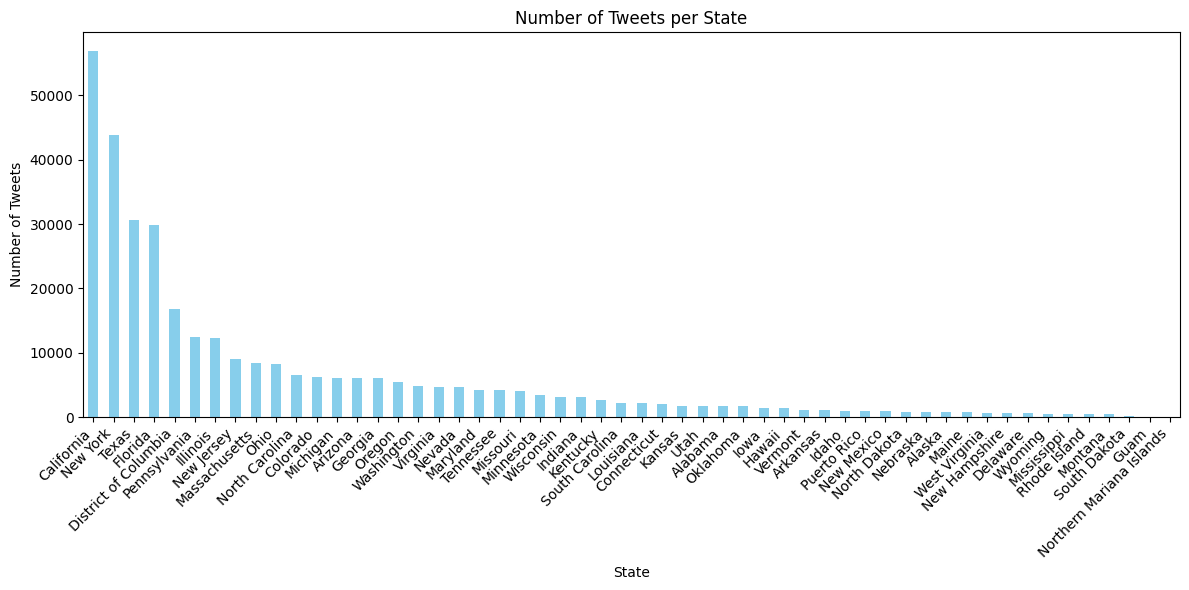

In [15]:
# plotting tweets per state
tweets_per_state = combined['state'].value_counts()
tweets_per_state.plot(kind='bar', color='skyblue', figsize=(12,6))
plt.title('Number of Tweets per State')
plt.xlabel('State')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

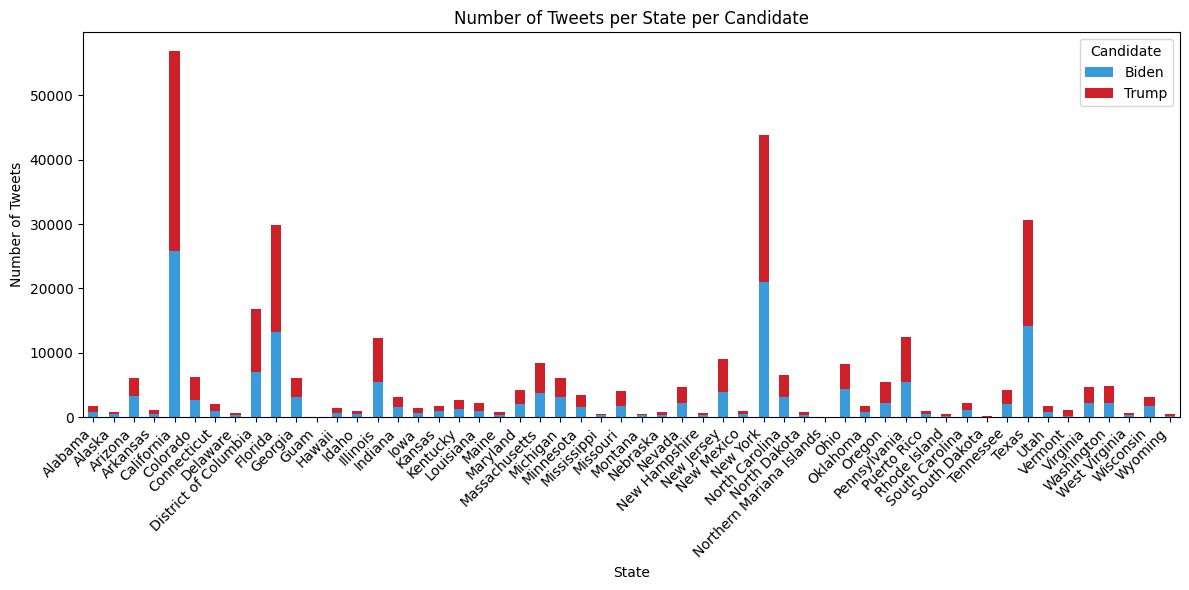

In [16]:
# plot tweets per state per candidate
tweets_per_state_candidate = combined.groupby(['state', 'candidate']).size().unstack(fill_value=0)
tweets_per_state_candidate.plot(kind='bar', stacked=True, color=['#3a9bdc', '#ce2029'], figsize=(12,6))
plt.title('Number of Tweets per State per Candidate')
plt.xlabel('State')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Candidate', labels=['Biden', 'Trump'])
plt.tight_layout()
plt.show()

We can see that for each state, the distribution between tweeting about Biden or Trump is quite equal, though how much each state tweets in general is very disproportionate. This will be important to keep in mind, especially when analyzing the states with fewer tweets in general. A low sample size will lead to more inaccurate results, in comparison to the states with a much higher sample of tweets.

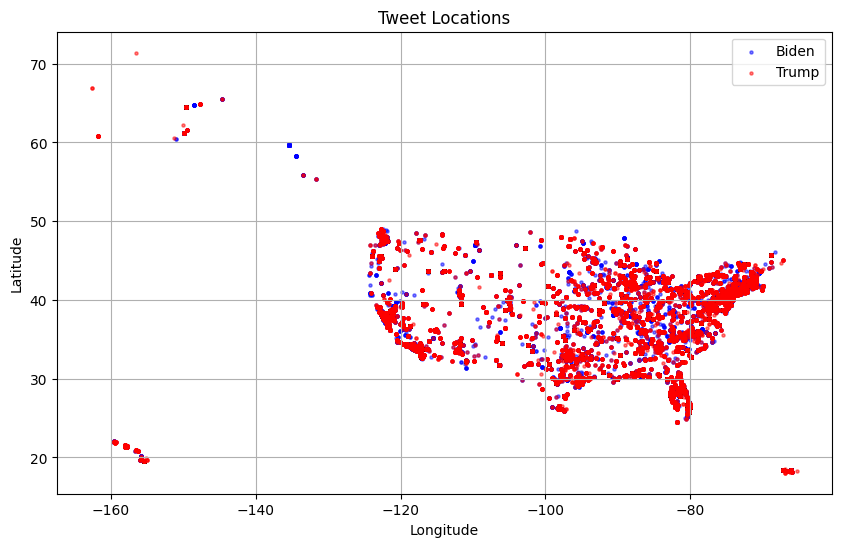

In [17]:
# let's plot the latitude and longitude coordinates

# remove outliers (not in Northern America)
combined = combined[combined['long'] <= 0]

# plotting
plt.figure(figsize=(10, 6))
plt.scatter(combined[combined['candidate'] == 'biden']['long'], 
            combined[combined['candidate'] == 'biden']['lat'], 
            s=5, color='blue', alpha=0.5, label='Biden')
plt.scatter(combined[combined['candidate'] == 'trump']['long'], 
            combined[combined['candidate'] == 'trump']['lat'], 
            s=5, color='red', alpha=0.5, label='Trump')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Tweet Locations')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
biden.describe()

,likes,retweet_count,user_followers_count,lat,long
count,776886.000000,776886.000000,7.768860e+05,355293.000000,355293.000000
mean,10.161164,2.131331,2.884994e+04,35.104203,-41.979660
std,390.974423,96.661527,4.141085e+05,17.907910,67.823724
min,0.000000,0.000000,0.000000e+00,-79.406307,-172.120051
25%,0.000000,0.000000,7.400000e+01,31.816038,-97.268406
50%,0.000000,0.000000,4.280000e+02,39.783730,-74.006015
75%,2.000000,0.000000,2.081000e+03,43.653482,5.966069
max,165702.000000,63473.000000,8.241710e+07,90.000000,179.048837


In [19]:
trump.describe()

,likes,retweet_count,user_followers_count,lat,long
count,970919.000000,970919.000000,9.709190e+05,445719.000000,445719.000000
mean,7.477011,1.698500,2.260357e+04,35.697936,-40.369638
std,158.058117,40.028419,3.042152e+05,18.823129,67.531751
min,0.000000,0.000000,0.000000e+00,-90.000000,-175.202642
25%,0.000000,0.000000,7.700000e+01,32.701939,-96.796856
50%,0.000000,0.000000,4.410000e+02,39.783730,-74.006015
75%,1.000000,0.000000,2.066000e+03,46.603354,6.776314
max,74084.000000,20491.000000,1.911533e+07,90.000000,179.048837


## Sentiment Analysis
In this next section, we will be deploying TextBlob to gain the sentiment polarity of these tweets. We will add this polarity value to our dataframe, create a new subset of just the states and their chosen candidate based on the tweets, and view the winning results.

In [38]:
from textblob import TextBlob

# create an empty list to store polarity values
polarity_list = []

# run through each tweet
for tweet in combined['tweet']:
    # encode the tweet
    blob = TextBlob(tweet)
    # sentiment analysis
    polarity = blob.sentiment.polarity
    # append polarity to the list
    polarity_list.append(polarity)

# Add polarity values to the DataFrame
combined['polarity'] = polarity_list

combined.head(10)

,created_at,tweet,likes,retweet_count,source,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,candidate,polarity
0,2020-10-15 00:00:01,Elecciones2020 | En Florida: JoeBiden dice que...,0.0,0.0,TweetDeck,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States,North America,Florida,FL,biden,0.00000
2,2020-10-15 00:00:20,This is how Biden made his ! TrumpIsNotAmer...,0.0,0.0,Twitter Web App,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States,North America,Montana,MT,biden,0.00000
4,2020-10-15 00:00:22,censorship HunterBiden Biden BidenEmails Biden...,1.0,0.0,Twitter Web App,390.0,"California, USA",36.701463,-118.755997,NaN,United States,North America,California,CA,biden,0.00000
6,2020-10-15 00:00:25,"In 2020, NYPost is being censorship CENSORED b...",0.0,0.0,Twitter for iPhone,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,biden,-0.14881
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,Twitter for Android,266.0,"Kentucky, USA",37.572603,-85.155141,NaN,United States,North America,Kentucky,KY,biden,-0.10000
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,83.0,"Tampa, Florida",27.947760,-82.458444,Tampa,United States,North America,Florida,FL,biden,-1.00000
21,2020-10-15 00:01:42,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,954.0,"Champaign, IL",40.116420,-88.243383,NaN,United States,North America,Illinois,IL,biden,0.00000
22,2020-10-15 00:01:47,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States,North America,California,CA,biden,0.14000
23,2020-10-15 00:01:50,JoeBiden calls him a lier and then insults him...,0.0,0.0,Twitter for iPhone,15.0,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,biden,0.00000
25,2020-10-15 00:01:57,BidenCrimeFamily JoeBiden HunterBiden HunterB...,0.0,0.0,Twitter for Android,29.0,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States,North America,California,CA,biden,0.00000


In [139]:
# first group state and candidate, and sum up the polarity values
state_polarity = combined_filtered.groupby(['state', 'candidate'])['polarity'].sum()

# now choose the candidate with the highest polarity for each state 
winning_candidate = state_polarity.groupby(level=0).idxmax().reset_index()

# specify the candidate
winning_candidate['polarity'] = winning_candidate['polarity'].apply(lambda x : x[1])

# print
winning_candidate

,state,polarity
0,Alabama,biden
1,Alaska,biden
2,Arizona,biden
3,Arkansas,biden
4,California,biden
5,Colorado,biden
6,Connecticut,biden
7,Delaware,biden
8,District of Columbia,biden
9,Florida,trump


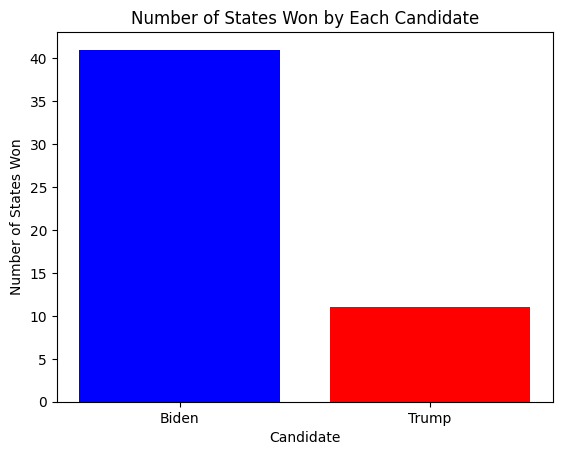

In [150]:
biden, trump = winning_candidate['polarity'].value_counts()
plt.bar(['Biden', 'Trump'], [biden, trump], color=['blue', 'red'])
plt.xlabel('Candidate')
plt.ylabel('Number of States Won')
plt.title('Number of States Won by Each Candidate')
plt.show()

## Verifying Results
Below we can see a plot of the number of electoral college votes (recieved from each state) in the 2020 election.

These results show we are not far off from the actual results, but there is a definite lean in Joe Biden's favor in our own results.

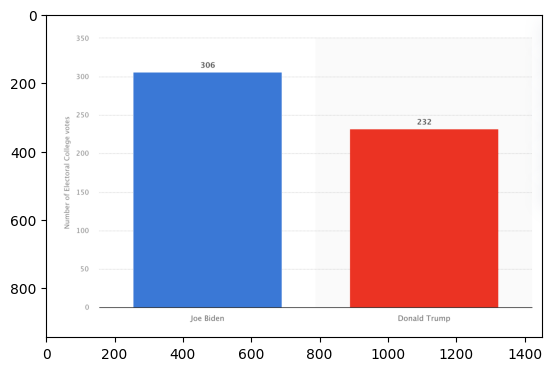

In [152]:
import matplotlib.image as mpimg
img = mpimg.imread('actual_results.png')
imgplot = plt.imshow(img)
plt.show()